# Bike Sharing Analysis

In [54]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Understanding The Data

In [55]:
# load hourly data
hourly_data = pd.read_csv("data/hour.csv")
hourly_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [56]:
hourly_data.shape

(17379, 17)

- Data contains 17379 rows and 17 columns

In [57]:
hourly_data.isnull().sum().sum()

0

- There are no missing values in the data

In [58]:
# .T is used to transpose the resulting data, hence columns become rows and vice versa.
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


## Data Transformation

In this section, data will be transformed to more human-readable formats. This way hidden patterns and relationships might arise when data is wrangled correctly.

In [59]:
# crate data copy
preprocessed_data = hourly_data.copy()

# transform mappings
season_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
yr_mapping = {0: 2011, 1: 2012}
weekdays = {0: "sunday", 1: "monday", 2: "tuesday", 3: "wednesday", 
                4: "thursday", 5: "friday", 6: "saturday"}
weather_mapping = {1: "clear", 2: "cloudy", 3: "light_rain_snow",
                4: "heavy_rain_snow"}

# transform seasons
preprocessed_data['season'] = preprocessed_data['season'] \
                    .apply(lambda x:season_mapping[x])
# transform yr
preprocessed_data['yr'] = preprocessed_data['yr'] \
                    .apply(lambda x: yr_mapping[x])
# transform weekday
preprocessed_data['weekday'] = preprocessed_data['weekday'] \
                    .apply(lambda x: weekdays[x])
# tranform weathersit
preprocessed_data['weathersit'] = preprocessed_data['weathersit'] \
                    .apply(lambda x: weather_mapping[x])
# transform hum
preprocessed_data['hum'] = preprocessed_data['hum'] * 100
# transform windspeed
preprocessed_data['windspeed'] = preprocessed_data['windspeed'] \
                    * 67

columns = ['season', 'yr', 'weekday', 'weathersit', 'hum', \
                                            'windspeed']

preprocessed_data[columns].sample(10, random_state=42)

,season,yr,weekday,weathersit,hum,windspeed
12830,summer,2012,saturday,clear,27.0,12.9980
8688,winter,2012,monday,clear,41.0,15.0013
7091,fall,2011,friday,clear,66.0,19.0012
12230,spring,2012,tuesday,clear,52.0,23.9994
431,winter,2011,thursday,clear,56.0,26.0027
1086,winter,2011,friday,clear,72.0,19.0012
11605,spring,2012,thursday,clear,58.0,8.9981
7983,fall,2011,sunday,clear,87.0,0.0000
10391,winter,2012,wednesday,clear,68.0,12.9980
7046,fall,2011,wednesday,clear,71.0,15.0013


## Preprocessing Temporal and Weather Features

In [60]:
"""
assert that total numver of rides is equal to the sum of
registered and caual ones
"""
assert (
    preprocessed_data['casual'] \
        + preprocessed_data['registered'] \
    == preprocessed_data['cnt']).all(), \
    "Sum of casual and registered rides not equal " \
    "to total number of rides"

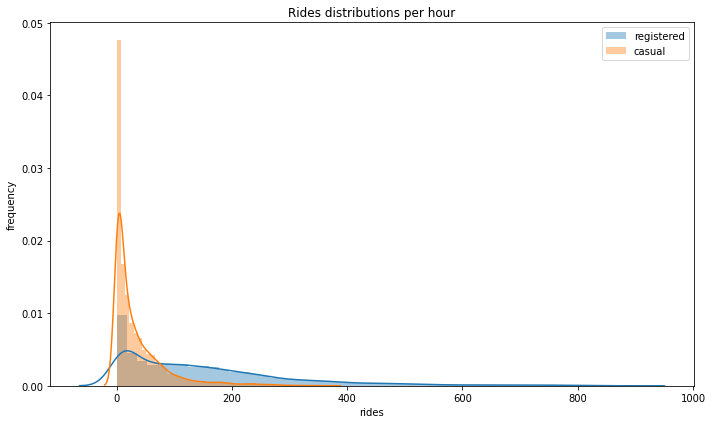

In [61]:
# plot distributions of registered vs casual rides
fig = plt.figure(figsize=(10,6))

sns.distplot(preprocessed_data['registered'], label="registered")
sns.distplot(preprocessed_data['casual'], label="casual")

plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Rides distributions per hour")
plt.tight_layout()

plt.savefig("figs/rides_distribution.png", format="jpeg")
plt.show()

- Registered users perform way more rides than casual ones
- Both distributions are skewed to the right, meaning, for most of the entries in the data, zero or a small number of rides were registered.
- Every entry has quite a large number of rides (that is, higher than 800)

### Evolution of rides over time

#### Number of rides each day

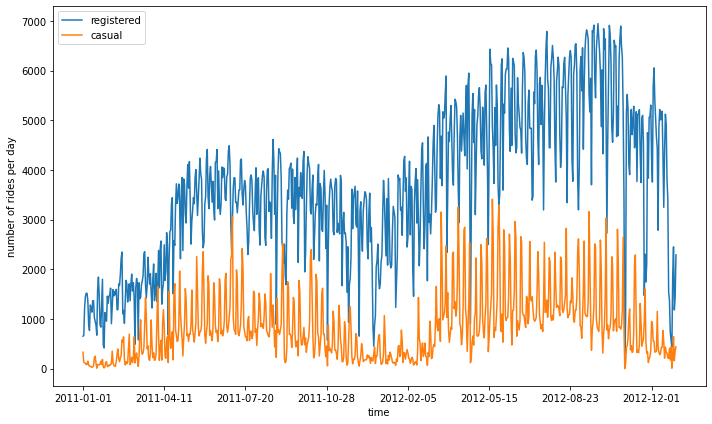

In [62]:
# plot evolution of rides over time
plot_data  = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))

ax.set_xlabel("time")
ax.set_ylabel("number of rides per day")
plt.tight_layout()

plt.savefig("figs/rides_daily.png", format='jpeg')
plt.show()

- The number of registered rides is always significantly higher than the number of casual rides per day.
- During the winter, the overall number of rides decreases (which is totally in line with my expectation, as bad weather and low tempreatures have a negative impact on ride-sharing services).

#### Number of rides each day (smoothed)

With the lot of variance in the time series above, it's necessary to smooth out the curves by taking the rolling mean and standard deviation of the two time series and plot those instead.

This way, visualisation is not only possible for the average number of rides for a specific time period (also known as a **window**) but also the expected deviation from the mean.

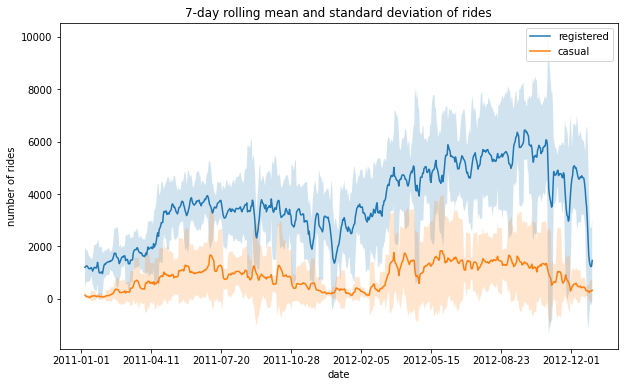

In [64]:
"""
Creating new dataframe with necessary for plotting columns, and obtain
number of rides per day, by grouping each day
"""

plot_data = preprocessed_data[['registered', 'casual', 'dteday']] \
                        .groupby('dteday').sum()

# window for computing mean and standard deviation
window = 7
rolling_means = plot_data.rolling(window).mean().round(decimals=2)
rolling_deviations = plot_data.rolling(window).std().round(
                                                     decimals=2)

# Create plot of the series, where we first plot the serie of rolling
# means, color the zone between the series of the rolling means +-2 
# rolling standard deviations.

ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, 
                rolling_means['registered']
                + 2*rolling_deviations['registered'],
                rolling_means['registered'] - 2* 
                rolling_deviations['registered'],
                alpha=0.2)

ax.fill_between(rolling_means.index,
                rolling_means['casual']
                + 2*rolling_deviations['casual'],
                rolling_means['casual']
                - 2*rolling_deviations['casual'],
                alpha=0.2)

ax.set_title("7-day rolling mean and standard deviation of rides")
ax.set_xlabel("date")
ax.set_ylabel("number of rides")

plt.savefig("figs/rides_aggregated.png", format="jpeg")
plt.show()

### Daily and Hourly Basis

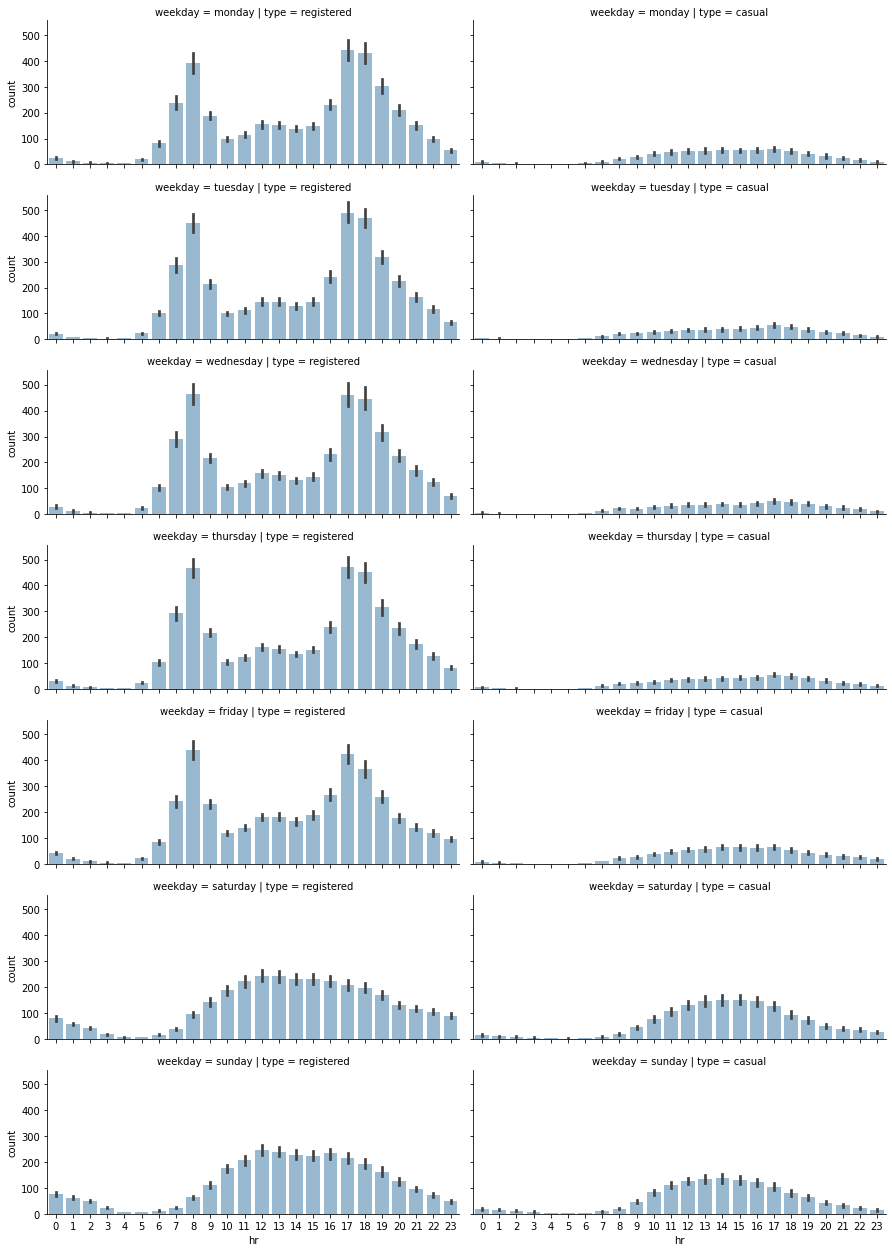

In [83]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]

# transform into count format
plot_data = plot_data.melt(id_vars=['hr', 'weekday',], 
                            var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='weekday',
                    col='type', height=2.5, aspect=2.5,
                    row_order = ['monday', 'tuesday', 'wednesday',
                        'thursday', 'friday', 'saturday', 'sunday'])

# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('figs/weekday_hour_distributions.png', format='jpeg')

plt.show()

Working days:
- The highest number of rides for registered users takes place around 8 AM and 6PM. This is totally expected, as it is likely that most registered users use the bike sharing service for commuting.
- The casual usage of bike sharing service4s on working days is quite limited, as the plot shows.

Weekends:
- The distribution changes for both casual and registered users.
- The registered rides still outnumber the casual ones.
- Both distributions are almost uniformly distributed betwen the time interval of 11 AM to 6 PM.

We can claim that most of the usage of bike sharing services occurs during working days, right before and right after the standard working time (that is, 9 to 5).

### Analyzing Seasonal Impact on Rides

In this section, the impact of the different seasons on the total number of rides will be investigated. 

The goal is to create grid plots, similar to the previous in which the number of rides will be distributed overs hours and weekdays, based on the current season.

#### Hourly Distribution of Rides

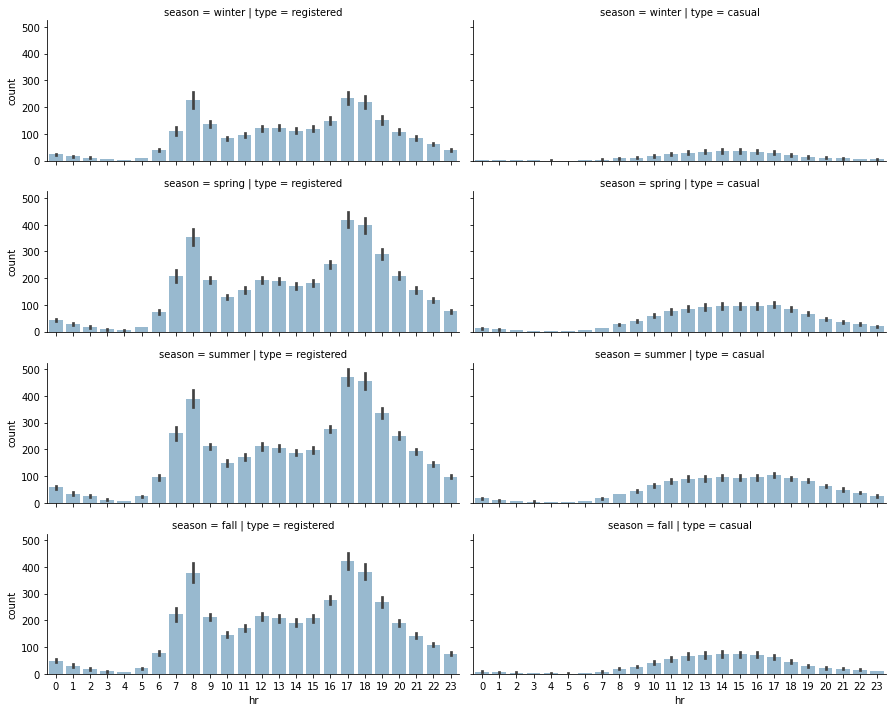

In [93]:
# select subset of data
plot_data = preprocessed_data[['hr', 'season', 
                            'registered', 'casual']]

# unpivot from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'],
                            var_name='type', value_name='count')

# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', 
                    col='type', height=2.5, aspect=2.5,
                    row_order=['winter', 'spring', 
                        'summer', 'fall'])


# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count',  alpha=.5)

grid.savefig('figs/season_hour_distributions.png', format='jpeg')
plt.show()


- Each season has a similar graph shape.
- There are fewer rides (registered and casual) during the winter. This makes sense, as fewer rides are likely to occur when the weather conditions are poor.

#### Daily Distribution of Rides

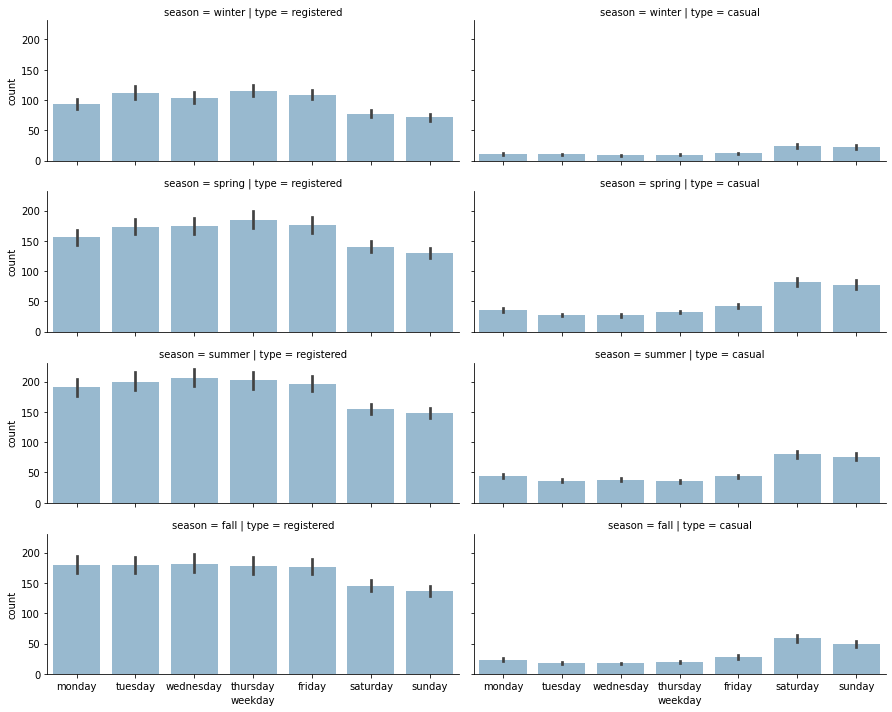

In [96]:
# select subsects
plot_data = preprocessed_data[['weekday','season', 
                                'registered', 'casual']]
# unpivot from wide to long format
plot_data = plot_data.melt(id_vars=['weekday', 'season'],
                            var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='season', col='type',
                        height=2.5, aspect=2.5, row_order=['winter',
                            'spring', 'summer', 'fall'])

grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, 
            order= ['monday', 'tuesday', 'wednesday', 'thursday',
                'friday', 'saturday', 'sunday'])

plt.tight_layout()
plt.savefig('figs/season_weekday_distributions.png', format='jpeg')
plt.show()

- There is a decreasing number of registered rides over the weekend (compared to the rest of the week), while the number of casual rides increases.

This could enforce an initial hypothesis, that is, that registered customers mostly use the bike sharing service for commuting (which could be the reason for the decreasing number of registered rides over the weeekend)

## Hypothesis Tests